<a href="https://colab.research.google.com/github/AndresCMontejo/Telecom_X/blob/main/TelecomX_An%C3%A1lisis_de_evasi%C3%B3n_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANALISIS DE EVASIÓN DE CLIENTES**

### **Extracción de datos**

In [1]:
import pandas as pd
import requests
import json
datos_clientes = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
resultado = json.loads(datos_clientes.text)
df = pd.DataFrame(resultado)
df.to_json('TelecomX_ClientesT', orient='records')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### **Normalizandos datos**

In [2]:
#Leyendo el archivo json usando el módulo Python JSON
with open('/content/TelecomX_ClientesT','r') as f:
    datos = json.loads(f.read())
df_f = pd.json_normalize(datos)
df_f.sample(n=20)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
3497,4826-DXMUP,No,Male,0,No,Yes,35,Yes,No,DSL,...,No,No,Yes,Yes,Yes,One year,Yes,Mailed check,72.10,2495.15
6203,8514-VZHEB,No,Male,0,Yes,Yes,59,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.50,1147.85
5766,7876-DNYAP,No,Female,0,Yes,Yes,69,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.80,1436.95
701,1000-AJSLD,Yes,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.10,20.1
5596,7641-EUYET,Yes,Male,1,Yes,Yes,46,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,100.70,4541.2
6189,8485-GJCDN,Yes,Female,1,No,No,5,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,69.05,318.5
4786,6556-DBKZF,No,Female,0,Yes,Yes,71,Yes,No,Fiber optic,...,No,Yes,No,No,No,Two year,No,Electronic check,76.05,5436.45
2763,3814-MLAXC,Yes,Female,0,No,No,31,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),79.85,2404.15
5910,8070-AAWZP,No,Male,1,Yes,No,24,No,No phone service,DSL,...,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,34.25,828.2
4451,6103-BOCOU,No,Female,0,No,No,26,Yes,Yes,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.70,2193


### **Manejo de inconsistencias**

In [3]:
df_f.columns.str.lower().str.replace('.', '_').str.replace(' ', '_')
df_f.columns = df_f.columns.str.lower().str.replace('.', '_').str.replace(' ', '_')
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [4]:
#Sustituyendo valores de 0 y 1 por yes or no en la columna de: customer_seniorcitizen
df_f['customer_seniorcitizen'] = df_f['customer_seniorcitizen'].astype(str)
df_f['customer_seniorcitizen'] = df_f['customer_seniorcitizen'].map({'0': 'No', '1': 'Yes'})
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   object 
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [5]:
df_f.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
df_f = df_f.replace('No phone service', 'No')
df_f = df_f.replace('No internet service', 'No')
df_f.sample(n=100)

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
1894,2676-SSLTO,No,Male,No,No,No,49,Yes,Yes,DSL,...,No,No,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),66.15,3199
307,0440-UEDAI,No,Female,No,No,No,53,Yes,No,Fiber optic,...,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),94.45,5042.75
4901,6701-DHKWQ,No,Female,No,Yes,Yes,61,No,No,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),51.35,3244.4
3898,5329-KRDTM,No,Male,Yes,Yes,No,72,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),77.35,5396.25
5357,7317-GGVPB,Yes,Male,No,Yes,No,71,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),108.60,7690.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,8780-IXSTS,Yes,Female,No,No,No,6,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.10,521.3
6071,8292-FRFZQ,No,Female,No,No,No,39,No,No,DSL,...,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),41.15,1700.9
2521,3521-HTQTV,No,Male,No,No,No,34,Yes,Yes,No,...,No,No,No,No,No,Two year,No,Bank transfer (automatic),26.10,980.35
1400,2024-BASKD,Yes,Female,No,No,No,1,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,74.60,74.6


In [7]:
#la columna account_charges_total es detectada como object, cuando debería de ser float64
df_f['account_charges_total'] = pd.to_numeric(df_f['account_charges_total'], errors='coerce')
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   object 
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

### **Validando que no existan otras inconsistencias**

In [8]:
for col in df_f.select_dtypes(include='object').columns:
    print(col, df_f[col].unique())

df_f.describe(include='all')

customerid ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
churn ['No' 'Yes' '']
customer_gender ['Female' 'Male']
customer_seniorcitizen ['No' 'Yes']
customer_partner ['Yes' 'No']
customer_dependents ['Yes' 'No']
phone_phoneservice ['Yes' 'No']
phone_multiplelines ['No' 'Yes']
internet_internetservice ['DSL' 'Fiber optic' 'No']
internet_onlinesecurity ['No' 'Yes']
internet_onlinebackup ['Yes' 'No']
internet_deviceprotection ['No' 'Yes']
internet_techsupport ['Yes' 'No']
internet_streamingtv ['Yes' 'No']
internet_streamingmovies ['No' 'Yes']
account_contract ['One year' 'Month-to-month' 'Two year']
account_paperlessbilling ['Yes' 'No']
account_paymentmethod ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
count,7267,7267,7267,7267,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7256.000000
unique,7267,3,2,2,2,2,NaN,2,2,3,...,2,2,2,2,2,3,2,4,NaN,NaN
top,9995-HOTOH,No,Male,No,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,1,5174,3675,6085,3749,5086,NaN,6560,4202,3198,...,4763,4776,5163,4477,4451,4005,4311,2445,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2280.634213
std,NaN,NaN,NaN,NaN,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,2268.632997
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000
25%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,400.225000
50%,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,1391.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,3785.300000


### **Estandarización y transformación de datos**

In [9]:
#Sustituyendo valores Si y No por 0 o 1 en la columna de: customer_seniorcitizen
df_f['customer_seniorcitizen'] = df_f['customer_seniorcitizen'].map({'No': '0', 'Yes': '1'})
df_f['customer_seniorcitizen'] = df_f['customer_seniorcitizen'].astype(int)
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [10]:
#COLUMNA CUENTAS DIARIAS
df_f['cuentas_diarias'] = df_f['account_charges_monthly'] / 30.44

In [11]:
df_f.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.155059
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.756242


In [12]:
#Sustituyendo No por 0, y Yes por 1
df_f = df_f.replace('No', '0')
df_f = df_f.replace('Yes', '1')
df_f.sample(n=100)

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuentas_diarias
6637,9124-LHCJQ,1,Female,0,0,0,1,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Mailed check,85.45,85.45,2.807162
69,0114-IGABW,0,Female,0,1,0,71,0,0,DSL,...,1,1,1,1,Two year,0,Bank transfer (automatic),58.25,4145.90,1.913601
5049,6900-PXRMS,1,Male,1,1,1,26,1,1,Fiber optic,...,1,0,1,1,Month-to-month,0,Electronic check,105.75,2710.25,3.474047
3958,5404-GGUKR,0,Male,0,0,0,5,1,0,DSL,...,0,0,0,0,Month-to-month,1,Electronic check,51.35,262.30,1.686925
568,0813-TAXXS,0,Male,0,0,0,55,1,1,DSL,...,1,0,1,1,Two year,1,Bank transfer (automatic),77.80,4323.35,2.555848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0318-QUUOB,1,Male,0,1,0,1,1,0,Fiber optic,...,0,0,1,0,Month-to-month,1,Electronic check,80.55,80.55,2.646189
6005,8205-MQUGY,0,Male,0,1,1,12,1,0,DSL,...,0,0,0,0,Month-to-month,1,Electronic check,49.20,571.15,1.616294
3979,5442-XSDCW,1,Male,0,1,1,11,1,0,Fiber optic,...,0,0,1,0,Month-to-month,1,Bank transfer (automatic),79.50,868.50,2.611695
5717,7813-TKCVO,0,Female,0,1,0,20,1,0,0,...,0,0,0,0,One year,0,Mailed check,20.35,393.15,0.668528


In [13]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [14]:
#Transformando columnas con object en int64 (para los valores 0 y 1)
import numpy as np
df_f = df_f.replace('', np.nan)

cols_to_convert = ['churn', 'customer_partner', 'customer_dependents', 'phone_phoneservice', 'phone_multiplelines',
                   'internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection',
                   'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies',
                   'account_paperlessbilling']

df_f = df_f.dropna(subset=cols_to_convert)
df_f[cols_to_convert] = df_f[cols_to_convert].astype('int64')
df_f.sample(n=20)

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuentas_diarias
6038,8242-JSVBO,0,Male,0,0,0,7,1,0,DSL,...,0,0,0,0,Month-to-month,1,Bank transfer (automatic),44.65,322.50,1.466820
429,0617-FHSGK,1,Male,0,0,1,49,1,1,Fiber optic,...,0,0,0,0,Month-to-month,0,Credit card (automatic),75.20,3678.30,2.470434
2409,3365-SAIGS,0,Female,0,0,0,17,1,0,Fiber optic,...,0,0,1,0,Month-to-month,1,Electronic check,83.55,1329.15,2.744744
4766,6522-YRBXD,0,Male,1,1,0,35,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,94.55,3365.40,3.106110
2549,3557-HTYWR,0,Female,0,0,0,47,1,1,DSL,...,0,1,0,1,Two year,0,Mailed check,74.05,3496.30,2.432654
5601,7649-PHJVR,0,Male,0,0,0,11,1,0,0,...,0,0,0,0,One year,0,Mailed check,19.50,226.80,0.640604
4953,6766-HFKLA,0,Female,0,1,0,56,1,1,Fiber optic,...,1,1,1,1,Two year,0,Bank transfer (automatic),103.20,5744.35,3.390276
1358,1963-VAUKV,1,Female,0,0,0,1,1,0,0,...,0,0,0,0,Month-to-month,0,Mailed check,20.40,20.40,0.670171
6846,9445-SZLCH,1,Female,0,1,1,36,1,1,Fiber optic,...,1,0,1,0,Month-to-month,1,Bank transfer (automatic),97.35,3457.90,3.198095
4923,6728-CZFEI,0,Female,0,0,0,15,1,0,DSL,...,0,0,1,0,One year,0,Mailed check,56.15,931.90,1.844612


In [15]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   int64  
 5   customer_dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   int64  
 8   phone_multiplelines        7043 non-null   int64  
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   int64  
 11  internet_onlinebackup      7043 non-null   int64  
 12  internet_deviceprotection  7043 non-null   int64  
 13  internet_techsupport       7043 non-null   int64  
 1

### **Analisis descriptivo**

In [16]:
df_f.describe()

,churn,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_paperlessbilling,account_charges_monthly,account_charges_total,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,2.127519
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,0.988504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.599540
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.166229
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.311104
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.951708
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.901117


### **Distribución de evasión**

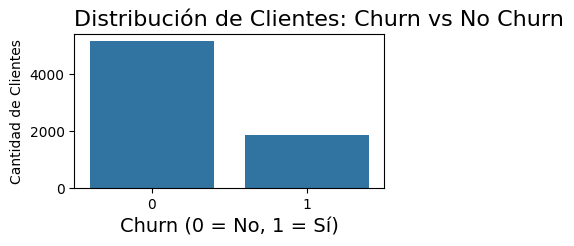

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# Conteo de valores
fig, ax = plt.subplots(figsize=(4,2))
sns.countplot(data=df_f, x='churn')
ax.set_title('Distribución de Clientes: Churn vs No Churn',
             loc='left', fontsize=16)
ax.set_xlabel('Churn (0 = No, 1 = Sí)', fontsize=14)
ax.set_ylabel('Cantidad de Clientes')
plt.show()

### **Recuento de evasión por variables categóricas**

In [18]:
df_f.customer_gender.unique()

array(['Female', 'Male'], dtype=object)

In [22]:
Genero_Female = ['Female']
Female = df_f.query('@Genero_Female in customer_gender')
Genero_Male = ['Male']
Male = df_f.query('@Genero_Male in customer_gender')

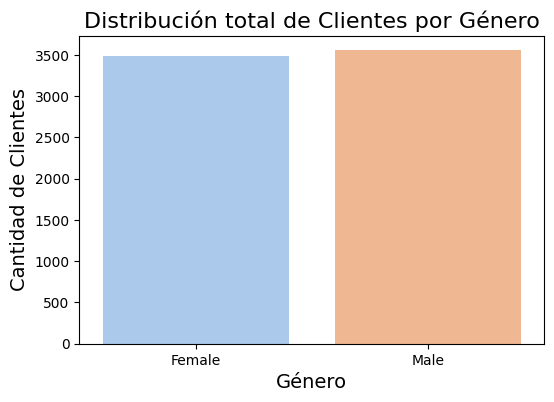

In [34]:
#Total de clientes Femeninos y Masculinos
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=df_f, x='customer_gender', hue='customer_gender', ax=ax, palette='pastel', legend=False)
ax.set_title('Distribución total de Clientes por Género', loc='center', fontsize=16)
ax.set_xlabel('Género', fontsize=14)
ax.set_ylabel('Cantidad de Clientes', fontsize=14)
plt.show()

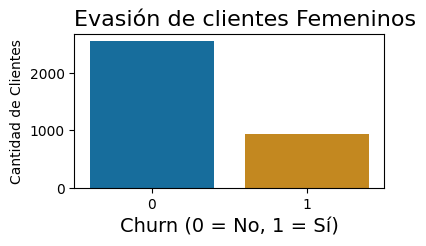

In [32]:
#Distribución de evasión de clientes femeninos
fig, ax = plt.subplots(figsize=(4,2))
sns.countplot(data=Female, x='churn', hue='churn', palette='colorblind', legend=False)
ax.set_title('Evasión de clientes Femeninos',
             loc='left', fontsize=16)
ax.set_xlabel('Churn (0 = No, 1 = Sí)', fontsize=14)
ax.set_ylabel('Cantidad de Clientes')
plt.show()

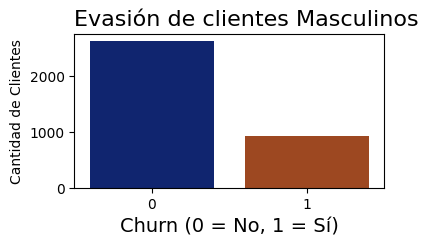

In [33]:
#Distribución de evasión de clientes masculinos
fig, ax = plt.subplots(figsize=(4,2))
sns.countplot(data=Male, x='churn',hue='churn', palette='dark', legend=False)
ax.set_title('Evasión de clientes Masculinos',
             loc='left', fontsize=16)
ax.set_xlabel('Churn (0 = No, 1 = Sí)', fontsize=14)
ax.set_ylabel('Cantidad de Clientes')
plt.show()